# Infinite variance

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
nbEpisodes = 100000
nbRuns = 10

mu=np.array([0.5,0.5]) #probabilities of taking actions left/right
pi=np.array([1.0,0.0]) #probabilities of taking actions left/right


Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


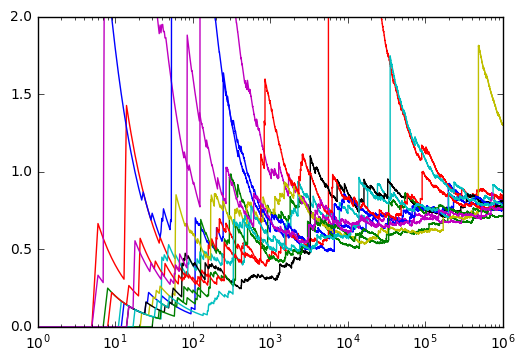

In [38]:
#MC approximation of the value function, after each episode
V=np.zeros((nbEpisodes,nbRuns))
Rho=np.zeros((nbEpisodes,nbRuns))

for run in range(nbRuns):
    print 'Run', run
    for ep in range(1,nbEpisodes):
        #generate episode following policy mu
        b=True
        R=0
        rho=1
        while(b):
            #repeat as long as terminal state is not reached
            r=np.random.rand(2)
            if(r[0]<mu[1]): #go right:episode ends
                rho=rho*pi[1]/mu[1]
                b=False
                break
            else:
                #go left, choose whether episodes ends 
                rho=rho*pi[0]/mu[0]
                if(r[1]<0.1):
                    #get reward of 1 and terminate the episode
                    R=1
                    b=False
                    break
        
        #keep track of ratio and approximated value
        Rho[ep,run]=rho
        V[ep,run]=V[ep-1,run]+(1.0/ep)*(rho*R-V[ep-1,run])


    #MC run finished
    plt.semilogx(range(nbEpisodes),V[:,run])

#plot evolution of MC approximation
plt.axis([0,nbEpisodes,0,2])
plt.show()
